## Dragon Real Estate-price predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,per,capita,crime,rate,by,town,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,proportion,of,residential,land,zoned,for,lots,over,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,proportion,of,non-retail,business,acres,per,town,NaN,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,Charles,River,dummy,variable,(=,1,if,tract,bounds,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,nitric,oxides,concentration,(parts,per,10,million),NaN,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,average,number,of,rooms,per,dwelling,NaN,NaN,NaN,NaN


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  MEDV         506 non-null    float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  1            13 non-null     float64
 19  CRIM.1  

In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,1
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0,0.0,0.0,0.0,13.00000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,NaN,NaN,NaN,NaN,8.00000
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,NaN,NaN,NaN,NaN,3.89444
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,NaN,NaN,NaN,NaN,2.00000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,NaN,NaN,NaN,NaN,5.00000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,NaN,NaN,NaN,NaN,8.00000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,NaN,NaN,NaN,NaN,11.00000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,NaN,NaN,NaN,NaN,14.00000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>,
        <Axes: title={'center': 'Unnamed: 14'}>,
        <Axes: title={'center': 'Unnamed: 15'}>],
       [<Axes: title={'center': 'Unnamed: 16'}>,
        <Axes: title={'center': 'Unnamed: 17'}>,
        <Axes: title={'center': '1'}>, <Axes: >]], dtype=object)

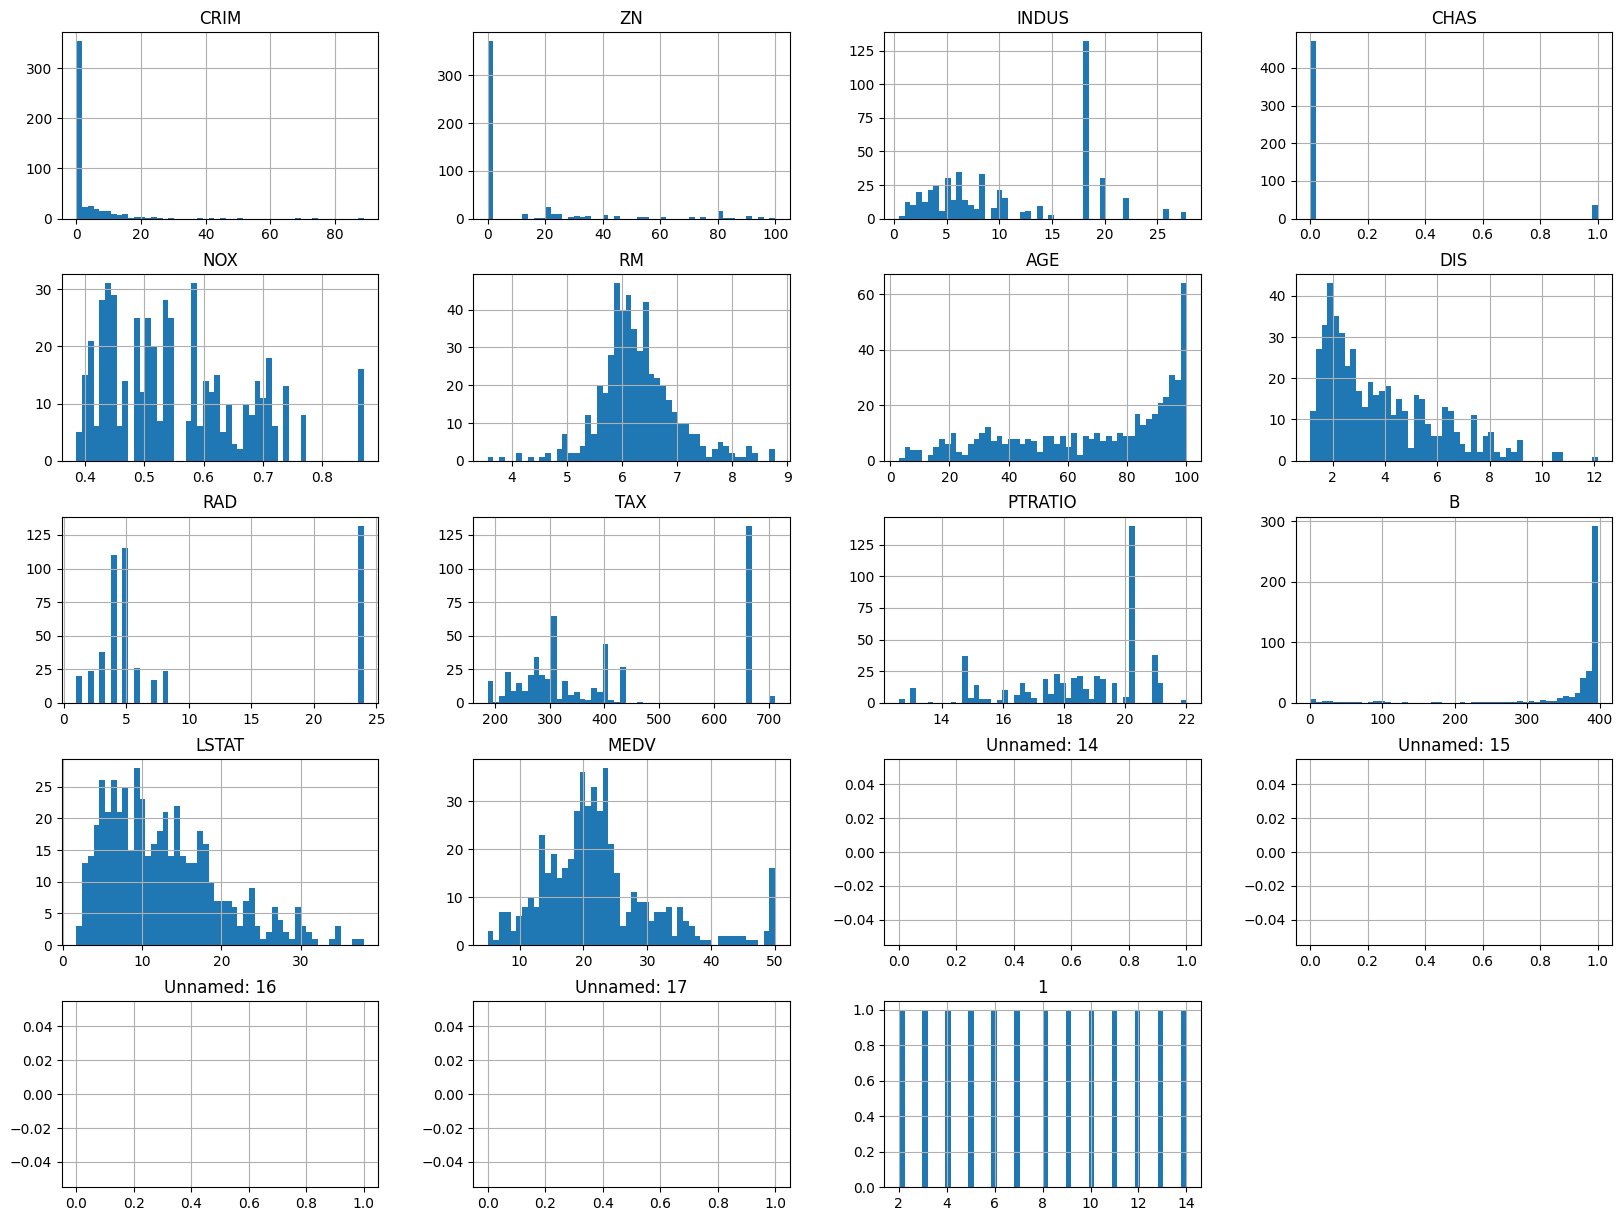

In [10]:
housing.hist(bins=50, figsize=(20,15))

## Train-Test splitting

In [11]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [12]:
train_set,test_set=split_train_test(housing,0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [13]:
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:405
Rows in test set:101



In [14]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f" Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

 Rows in train set:404
Rows in test set:102



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
            strat_train_set=housing.loc[train_index]
            strat_test_set=housing.loc[test_index]

In [16]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 342 to 218
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         102 non-null    float64
 1   ZN           102 non-null    float64
 2   INDUS        102 non-null    float64
 3   CHAS         102 non-null    int64  
 4   NOX          102 non-null    float64
 5   RM           102 non-null    float64
 6   AGE          102 non-null    float64
 7   DIS          102 non-null    float64
 8   RAD          102 non-null    int64  
 9   TAX          102 non-null    int64  
 10  PTRATIO      102 non-null    float64
 11  B            102 non-null    float64
 12  LSTAT        102 non-null    float64
 13  MEDV         102 non-null    float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  1            1 non-null      float64
 19  CRIM.1     

In [17]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [18]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [19]:
95/7

13.571428571428571

In [20]:
376/28

13.428571428571429

## Looking for Correlations

In [21]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


ValueError: could not convert string to float: 'ZN'

In [ ]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

In [ ]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)


## Trying Out Attribute combinations

In [ ]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [ ]:
housing.head()

KeyError: 'TAXRM'

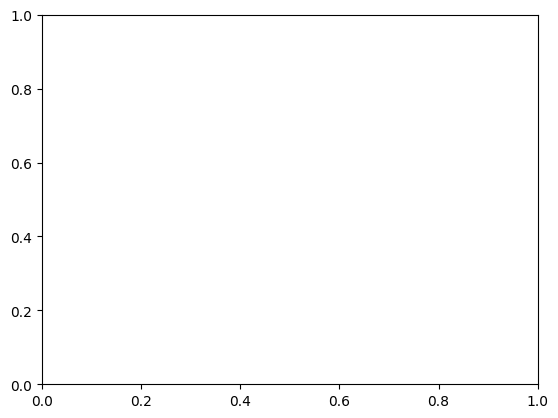

In [24]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [ ]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

 ## Missing Attributes

In [ ]:
# To take care of missing attribute you have of three options:
# 1.Get rid of the missing data points.
# 2.get rid of the whole attributes.
# 3.set the value to some value (0,mean or median)

In [ ]:
a=housing.dropna(subset=["RM"])
a.shape
# note that the origional housing dataframe will remain unchanged

In [ ]:
housing.drop("RM",axis=1)
# note that there is no RM column

In [ ]:
housing.drop("RM",axis=1).shape

In [ ]:
median=housing["RM"].median()

In [ ]:
housing["RM"].fillna(median)
# Note that the origional housing dataframe will remain unchanged

In [ ]:
housing.shape

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

In [ ]:
imputer.statistics_

In [ ]:
x=imputer.transform(housing)

In [ ]:
housing_tr=pd.DataFrame(x,columns=housing.columns)

In [ ]:
housing_tr.describe()

## Scikit-learn Design

1. Estimators-It estimates somre parameter based on a dataset.
   Eg.imputer.It has a fit method and transform method.Fit
    method-Fits the dataset and calculates internal parameters.
2. Transformers-transform method takes input and return output
    based on the learning  from fit().it also has a convenience
    function called fit-transform()which fitsand then transforms.
3. predictors-Linear Regression model is an example of predictor.fit()
  and predict()are two common functions.it also gives score()
  function which will evaluate the predictions.

## Feature Scaling

primarily,two types of feature scaling methods:
1. Min-max scaling(Normaliztion)
   (value-min)/(max-min)
    sklearn provides a class called minmxscaler for this

2. Standardization
   (value-mean)/std
   sklearn provide a class called standardscaler for this
   

## Creating a pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    #..........add as many as you want in your pipeline
    ('std_scaler',StandardScaler()),
])

In [23]:
housing_num_tr = my_pipeline.fit_transform(housing)

NameError: name 'my_pipeline' is not defined

In [22]:
housing_num_tr

NameError: name 'housing_num_tr' is not defined

## Selecting a desired model for Dragon Real Estates

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressior
#model = LinearRegression()
model=DecisionTreeRegressior()
model.fit(housing_num_tr,housing_labels)

NameError: name 'housing_num_tr' is not defined

In [26]:
some_data=housing.iloc[:5]

In [27]:
some_labels=housing_labels.iloc[:5]

NameError: name 'housing_labels' is not defined

In [28]:
prepared_data = my_pipeline.transform(some_data)

NameError: name 'my_pipeline' is not defined

In [29]:
model.predict(prepared_data)

NameError: name 'prepared_data' is not defined

In [30]:
list(some_labels)

NameError: name 'some_labels' is not defined

## Evaluating the model

In [33]:
from sklearn.matrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(lin_mse)

ModuleNotFoundError: No module named 'sklearn.matrics'

In [35]:
rmse

NameError: name 'rmse' is not defined

## Using better evaluation technique-cross validation

In [36]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
                         

NameError: name 'housing_num_tr' is not defined

In [37]:
rmse_scores

NameError: name 'rmse_scores' is not defined

In [40]:
def print_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("standard deviation:",scores.std())

In [41]:
print_scores(rmse_scores)

NameError: name 'rmse_scores' is not defined

Quiz:convert this notebook into a python file and run the pipeline using visual studio code

## Saving the model

In [43]:
from joblib import dump,load
dump(model,'Dragon.jobib')

['Dragon.jobib']

## Testing the model on test data

In [44]:
x_test = strat_test_set.drop("MEDV",axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.trnsform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squred_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

NameError: name 'my_pipeline' is not defined

In [45]:
final_rmse

NameError: name 'final_rmse' is not defined